### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ex1data1.txt")
df = pd.DataFrame(data)
df["ones"] = 1
df["ones"] = df["ones"].astype("int32")
df.head()
cols = list(df.columns)
one = cols.pop(cols.index("ones"))
cols.insert(0,one)
df = df[cols]
df.head()

,ones,Size,Price
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### Dividing the feature vector and output vector

In [3]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values
m = y.size
y  = y.reshape(m,1)
theta = np.zeros(2).reshape(2,1)
print(theta.reshape(2,1))

[[0.]
 [0.]]


### Dividing the dataset into test set and training set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)
y_train.shape

(77, 1)

### Using cost function to compute initial cost

In [5]:
def computecost(x,y,thet):
    m  = y_train.size
    prediction = x.dot(thet)
    hypothesis = prediction - y
    cost = 1/(2*m) * np.sum(hypothesis**2)
    return cost
j = computecost(x_train,y_train,theta)
j

35.55833026030779

### Applying gradient descent

In [6]:
def gradient(x1,y1,thetaa,alph,itter):
    j_cost = np.zeros(itter+1).reshape(itter+1,1)
    for i in range(0,itter+1):
        m  = y1.size
        prediction = x1.dot(thetaa)
        hypo = prediction - y1
        delta = (hypo.T).dot(x1)
        delta = delta.reshape(thetaa.size,1)
        thetaa = thetaa - (alph/m) * delta
        j_cost[i] = computecost(x1,y1,thetaa)
    return(thetaa,j_cost)     

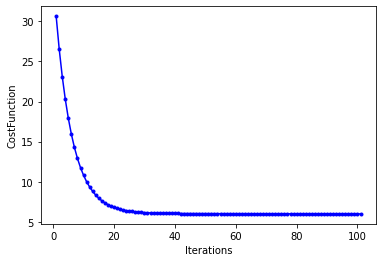

In [7]:
theta = np.zeros(2).reshape(2,1)
parameter,cost = gradient(x_train,y_train,theta,0.001,100);
import matplotlib.pyplot as plt
x = np.arange(1,(cost.size)+1).reshape((cost.size),1)
plt.plot(x,cost,"b.-")
plt.xlabel("Iterations")
plt.ylabel("CostFunction")
plt.show()